In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
url='https://raw.githubusercontent.com/AkarshVyas/Machine-Learning-Part-1/refs/heads/main/insurance.csv'

df=pd.read_csv(url)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EDA


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

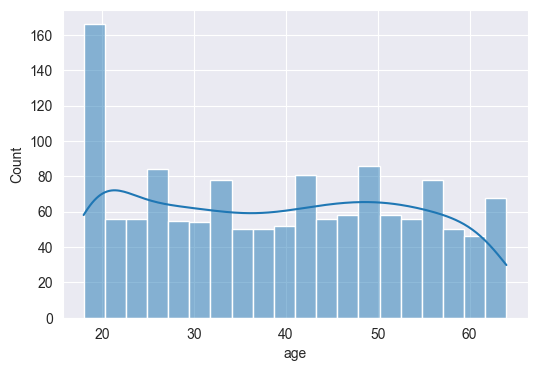

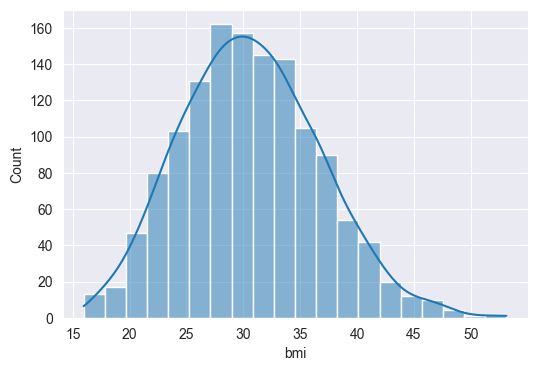

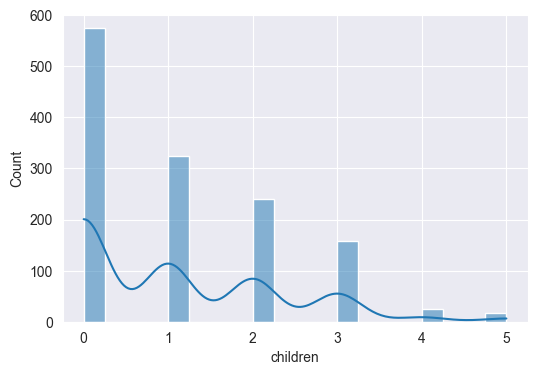

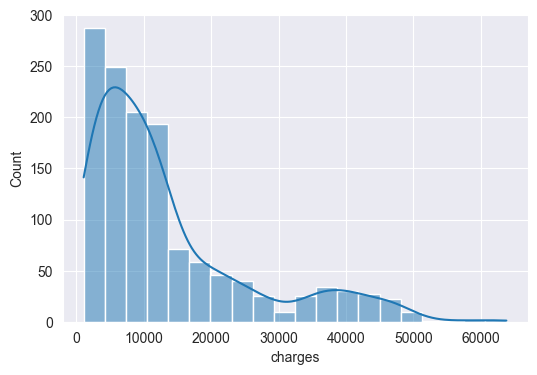

In [10]:
numeric_colums=['age','bmi','children','charges']
for col in numeric_colums:
      plt.figure(figsize=(6,4))
      sns.histplot(df[col],kde=True,bins=20)


<Axes: xlabel='children', ylabel='count'>

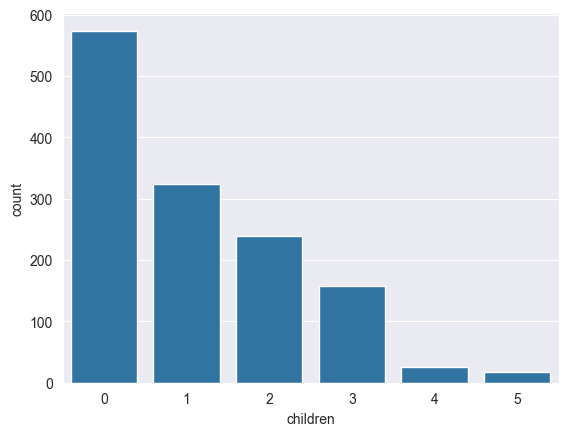

In [11]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

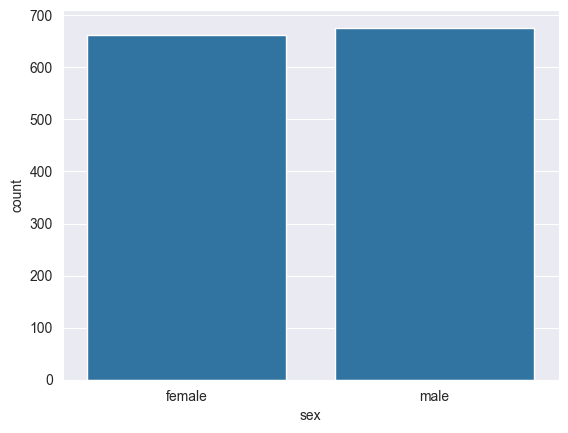

In [12]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

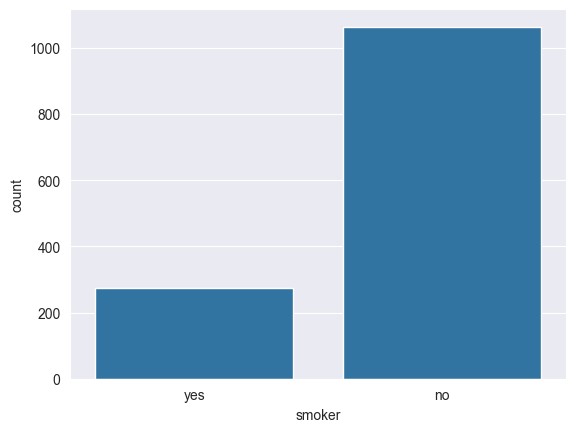

In [13]:
sns.countplot(x=df['smoker'])

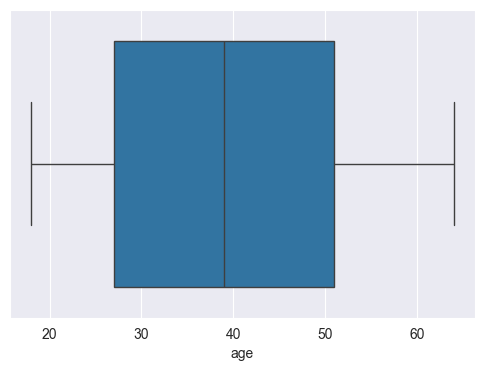

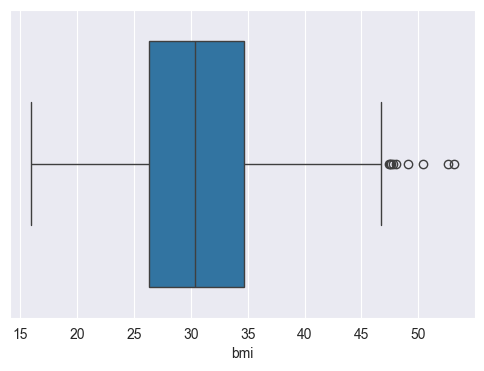

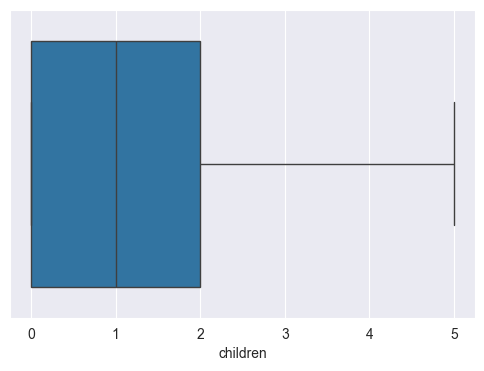

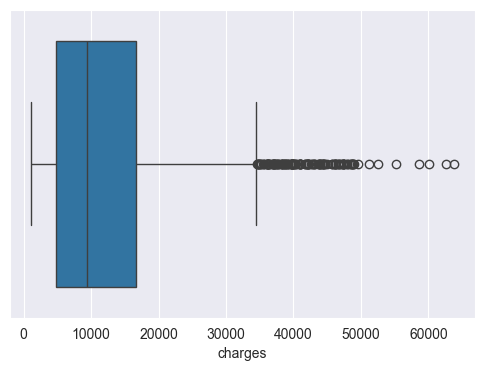

In [14]:
for col in numeric_colums:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

<Axes: >

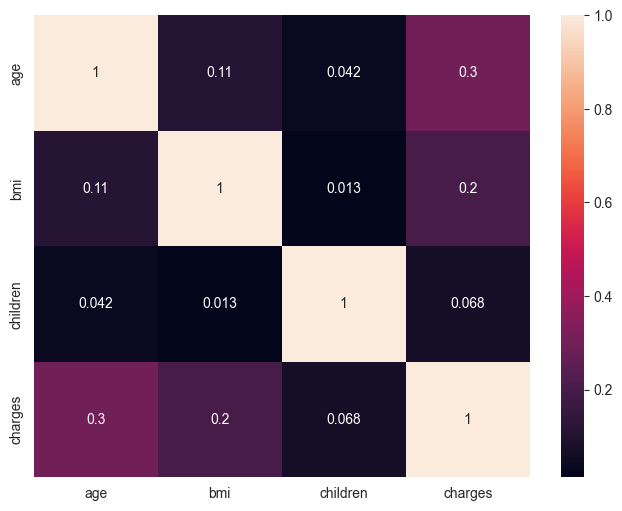

In [15]:

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)



DATA CLEANING AND PREPROCESSING


In [16]:
df_cleaned=df.copy()

In [17]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.shape

(1338, 7)

In [19]:
df_cleaned.drop_duplicates(inplace=True)

In [20]:
df_cleaned.shape

(1337, 7)

In [21]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [24]:
df_cleaned['sex']=df_cleaned['sex'].map({'male':0,'female':1})

In [25]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [26]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [27]:
df_cleaned['smoker']=df_cleaned['smoker'].map({'yes':0,'no':1})

In [28]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [29]:
df_cleaned.rename(columns={
    'sex':'is_female',
    'smoker':'is_smoker',
},inplace=True)

In [30]:
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [31]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [32]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

In [33]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,False,False,True
1,18,0,33.770,1,1,1725.55230,False,True,False
2,28,0,33.000,3,1,4449.46200,False,True,False
3,33,0,22.705,0,1,21984.47061,True,False,False
4,32,0,28.880,0,1,3866.85520,True,False,False


In [34]:
df_cleaned=df_cleaned.astype(int)

In [35]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,0,16884,0,0,1
1,18,0,33,1,1,1725,0,1,0
2,28,0,33,3,1,4449,0,1,0
3,33,0,22,0,1,21984,1,0,0
4,32,0,28,0,1,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,1,10600,1,0,0
1334,18,1,31,0,1,2205,0,0,0
1335,18,1,36,0,1,1629,0,1,0
1336,21,1,25,0,1,2007,0,0,1


In [36]:
df_cleaned.shape

(1337, 9)

Feature Engineering And Extraction

<Axes: xlabel='bmi', ylabel='Count'>

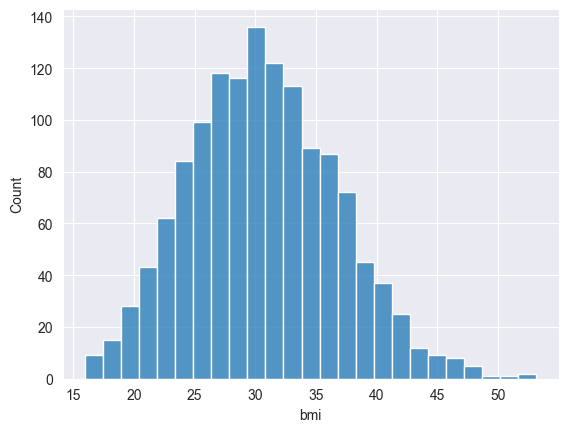

In [37]:
sns.histplot(df['bmi'])

In [38]:
df_cleaned['bmi_category']=pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['Underweight','Normal','Overweight','Obese']
)

In [39]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,0,16884,0,0,1,Overweight
1,18,0,33,1,1,1725,0,1,0,Obese
2,28,0,33,3,1,4449,0,1,0,Obese
3,33,0,22,0,1,21984,1,0,0,Normal
4,32,0,28,0,1,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,1,10600,1,0,0,Obese
1334,18,1,31,0,1,2205,0,0,0,Obese
1335,18,1,36,0,1,1629,0,1,0,Obese
1336,21,1,25,0,1,2007,0,0,1,Overweight


In [40]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)

In [41]:
df_cleaned=df_cleaned.astype(int)

In [42]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,0,16884,0,0,1,0,1,0
1,18,0,33,1,1,1725,0,1,0,0,0,1
2,28,0,33,3,1,4449,0,1,0,0,0,1
3,33,0,22,0,1,21984,1,0,0,1,0,0
4,32,0,28,0,1,3866,1,0,0,0,1,0


In [43]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [44]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scaler=StandardScaler()
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

In [45]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,0,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,1,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,1,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,1,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,1,3866,1,0,0,0,1,0


In [97]:
from scipy.stats import pearsonr

selected_features=[
    'age', 'is_female', 'bmi', 'children', 'is_smoker',
    'charges', 'region_northwest', 'region_southeast',
    'region_southwest','bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

correlations={
    feature:pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]
    for feature in selected_features
}

correlations_df=pd.DataFrame(list(correlations.items()),columns=['Feature','pearsonr'])
correlations_df.sort_values(by='pearsonr',ascending=True)

,Feature,pearsonr
5,charges,1.000000
0,age,0.298309
11,bmi_category_Obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
6,region_northwest,-0.038695
8,region_southwest,-0.043637
1,is_female,-0.058046
9,bmi_category_Normal,-0.104042


In [47]:
cat_features=[
    'bmi_category_Overweight','bmi_category_Obese','bmi_category_Normal',
    'region_northwest','region_southeast','region_southwest',
    'is_female','is_smoker'
]

In [48]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha=0.05

df_cleaned['charges_bin']=pd.qcut(df_cleaned['charges'],q=4,labels=False)
chi2_results={}

for col in cat_features:
    contingency=pd.crosstab(df_cleaned[col],df_cleaned['charges_bin'])
    chi2_stat,p_val,_,_=chi2_contingency(contingency)
    decision='Reject Null' if p_val< alpha else 'Accept Null'

    chi2_results[col]={
        'chi2_statistic':chi2_stat,
        'p_value':p_val,
        'Decision':decision
    }


In [125]:
chi2_df=pd.DataFrame(chi2_results).T
chi2_df=chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null
region_southeast,15.998167,0.001135,Reject Null
is_female,10.258784,0.01649,Reject Null
bmi_category_Obese,8.515711,0.036473,Reject Null
region_southwest,5.091893,0.165191,Accept Null
bmi_category_Overweight,4.25149,0.235557,Accept Null
bmi_category_Normal,3.708088,0.29476,Accept Null
region_northwest,1.13424,0.768815,Accept Null


In [139]:
final_df=df_cleaned[['age','is_female','bmi','is_smoker','charges','region_northwest','region_southeast']]

In [140]:
final_df

,age,is_female,bmi,is_smoker,charges,region_northwest,region_southeast
0,-1.440418,1,-0.517949,0,16884,0,0
1,-1.511647,0,0.462463,1,1725,0,1
2,-0.799350,0,0.462463,1,4449,0,1
3,-0.443201,0,-1.334960,1,21984,1,0
4,-0.514431,0,-0.354547,1,3866,1,0
...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1,10600,1,0
1334,-1.511647,1,0.135659,1,2205,0,0
1335,-1.511647,1,0.952670,1,1629,0,1
1336,-1.297958,1,-0.844753,1,2007,0,0


In [141]:
final_df.shape

(1337, 7)

In [142]:
final_df

,age,is_female,bmi,is_smoker,charges,region_northwest,region_southeast
0,-1.440418,1,-0.517949,0,16884,0,0
1,-1.511647,0,0.462463,1,1725,0,1
2,-0.799350,0,0.462463,1,4449,0,1
3,-0.443201,0,-1.334960,1,21984,1,0
4,-0.514431,0,-0.354547,1,3866,1,0
...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1,10600,1,0
1334,-1.511647,1,0.135659,1,2205,0,0
1335,-1.511647,1,0.952670,1,1629,0,1
1336,-1.297958,1,-0.844753,1,2007,0,0


In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X=final_df.drop('charges',axis=1)
y=final_df['charges']

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
model=LinearRegression()

In [148]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [149]:
y_pred=model.predict(X_test)

In [150]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.8057668928572822

In [151]:
n=X_test.shape[0]
p=X_test.shape[1]
adjusted_r2=1-((1-r2)* (n-1)/(n-p-1))
adjusted_r2

0.8013017639574496